In [143]:
import pandas as pd
import quandl 
import numpy as np
import math, datetime
from sklearn import preprocessing, cross_validation, svm, neighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import random
import xgboost as xgb

In [144]:
style.use("ggplot")

In [145]:
#LINEAR REGRESION

In [146]:
def random_sets(how_many,var,step):
    ys=[]
    xs=[]
    for i in range(how_many):
        y=i*step+random.uniform(-var,var)
        ys.append(y)
        xs.append(i)
    return pd.DataFrame(xs), np.array(ys)
    

In [157]:
HOW_MANY=80
VAR=20
STEP=1

In [158]:
xs,ys=random_sets(HOW_MANY,VAR,STEP)

In [159]:
clf=LinearRegression()
clf.fit(xs,ys)
clf.score(xs,ys)

0.81096149358853009

In [160]:
preds=[]
for row in xs.itertuples():
    a=row[1]*clf.coef_+clf.intercept_
    preds.append(a[0])

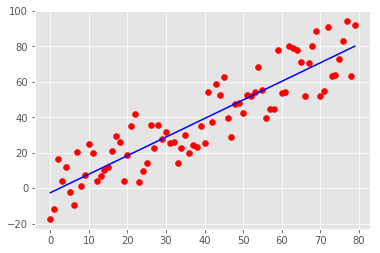

In [161]:
plt.scatter(xs,ys,color="red")
plt.plot(xs,preds,color="blue")
plt.show()

In [162]:
from sklearn.neighbors import KNeighborsClassifier
 


In [163]:
df=pd.read_csv("data_sets/iris.csv")

In [164]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [165]:
X=np.array(df.drop(["class"],1))
y=np.array(df["class"])

In [166]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [167]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [168]:
# Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1),
# and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [169]:
#what is it? 
clf.score(X_test,y_test)

0.96666666666666667

In [170]:
clf.predict([8.1,4,1.5,7.4])
clf.predict_proba([8.1,4,1.5,7.4])

/home/dorota/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dorota/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.,  0.,  1.]])

In [171]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [172]:
df_stetosa=df[df["class"]=="Iris-setosa"]
df_virginica=df[df["class"]=="Iris-virginica"]
df_versicolor=df[df["class"]=="Iris-versicolor"]

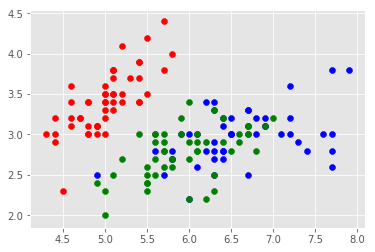

In [173]:
plt.scatter(df_stetosa["sepal_length"],df_stetosa["sepal_width"],color="red")
plt.scatter(df_virginica["sepal_length"],df_virginica["sepal_width"],color="blue")
plt.scatter(df_versicolor["sepal_length"],df_versicolor["sepal_width"],color="green")
plt.show()

In [174]:
df["class"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [175]:
basic_preds=clf.predict(df[["sepal_length","sepal_width","petal_length","petal_width"]])

In [176]:
#polaczyc te kolumny, narysowac tak smao

In [177]:
df["preds"]=basic_preds

In [178]:
df_pred_stetosa=df[df["preds"]=="Iris-setosa"]
df_pred_virginica=df[df["preds"]=="Iris-virginica"]
df_pred_versicolor=df[df["preds"]=="Iris-versicolor"]

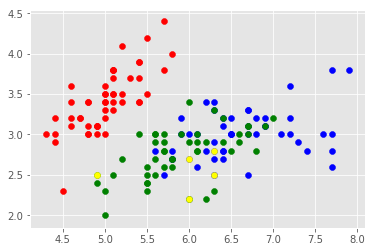

In [179]:
plt.scatter(df_pred_stetosa["sepal_length"],df_pred_stetosa["sepal_width"],color="red")
plt.scatter(df_pred_virginica["sepal_length"],df_pred_virginica["sepal_width"],color="blue")
plt.scatter(df_pred_versicolor["sepal_length"],df_pred_versicolor["sepal_width"],color="green")
plt.scatter(not_eq["sepal_length"],not_eq["sepal_width"],color="yellow")
plt.show()

In [183]:
not_eq=df[df["preds"]!=df["class"]]

In [209]:
confusion_matrix(df["preds"], df["class"])

array([[50,  0,  0],
       [ 0, 47,  1],
       [ 0,  3, 49]])

In [184]:
#k means

In [185]:
from sklearn.cluster import KMeans

In [186]:
clf=KMeans(n_clusters=3)

In [187]:
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [188]:
labels=clf.labels_
centroids=clf.cluster_centers_

In [189]:
labels

array([2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       0, 0, 0, 1, 1], dtype=int32)

In [190]:
colors=["r.","b.","k.","c."]

In [191]:
X_train=pd.DataFrame(X_train)

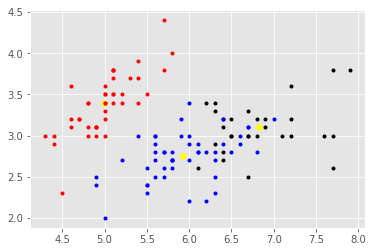

In [192]:
for i in range(len(X_train)):
    plt.plot(X_train.iloc[i,0],X_train.iloc[i,1],colors[labels[i]])
plt.scatter(centroids[:,0], centroids[:,1], color="yellow")
plt.show()
    

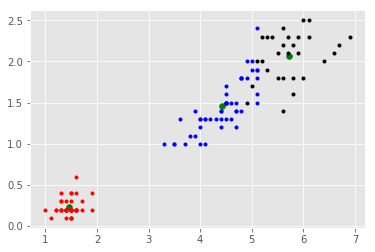

In [193]:
for i in range(len(X_train)):
    plt.plot(X_train.iloc[i,2],X_train.iloc[i,3],colors[labels[i]])
plt.scatter(centroids[:,2], centroids[:,3], color="green")
plt.show()
    

In [203]:
labels

array([2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       0, 0, 0, 1, 1], dtype=int32)

In [228]:
def lab_to_num(l):
    num_list=[]
    for i,lab in enumerate(l):
        if lab==0:
            num_list.append("Iris-setosa")
        elif lab==1:
            num_list.append("Iris-versicolor")
        elif lab==2:
            num_list.append("Iris-virginica")  
    return num_list    
    

In [229]:
new_labels=lab_to_num(labels)

In [230]:
from sklearn.metrics import confusion_matrix
confusion_matrix(new_labels, y_train)

array([[42,  0,  0],
       [ 0, 37, 12],
       [ 0,  2, 27]])

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
lr_model = LogisticRegression(C=1)

In [233]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
lr_preds=lr_model.predict(X_train)

In [239]:
confusion_matrix(lr_preds, y_train)

array([[42,  0,  0],
       [ 0, 34,  2],
       [ 0,  5, 37]])